<a href="https://colab.research.google.com/github/Shiblu31/ML_Lab_R/blob/main/Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/DATASET/marital status.csv")

In [5]:
df.head()

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0


In [6]:
handle = df['status'].median()

In [7]:
df.status = df.status.fillna(df['status'].median())

In [8]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,1.0
8,19,0.0
9,22,0.0


In [9]:
df['status'].value_counts()

,count
status,
0.0,11
1.0,7


In [10]:
x = df[['age']]

In [11]:
x

,age
0,21
1,33
2,24
3,28
4,17
5,33
6,23
7,30
8,19
9,22


In [12]:
y = df['status']

In [13]:
y

,status
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,1.0
8,0.0
9,0.0


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.70,random_state = 1)

In [15]:
xtrain

,age
9,22
8,19
12,24
11,20
5,33


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [19]:
model.predict(xtest)

array([0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.])

In [20]:
model.score(xtest,ytest)

0.8461538461538461

In [21]:
model.predict_proba(xtest)

array([[9.75201765e-01, 2.47982350e-02],
       [6.22737390e-01, 3.77262610e-01],
       [3.54464294e-02, 9.64553571e-01],
       [9.54250013e-01, 4.57499868e-02],
       [4.66810296e-01, 5.33189704e-01],
       [3.17108495e-01, 6.82891505e-01],
       [9.99699822e-01, 3.00177658e-04],
       [9.99434197e-01, 5.65803280e-04],
       [6.47969497e-02, 9.35203050e-01],
       [8.54390354e-01, 1.45609646e-01],
       [9.92897265e-01, 7.10273472e-03],
       [9.17101144e-01, 8.28988563e-02],
       [9.98933771e-01, 1.06622892e-03]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


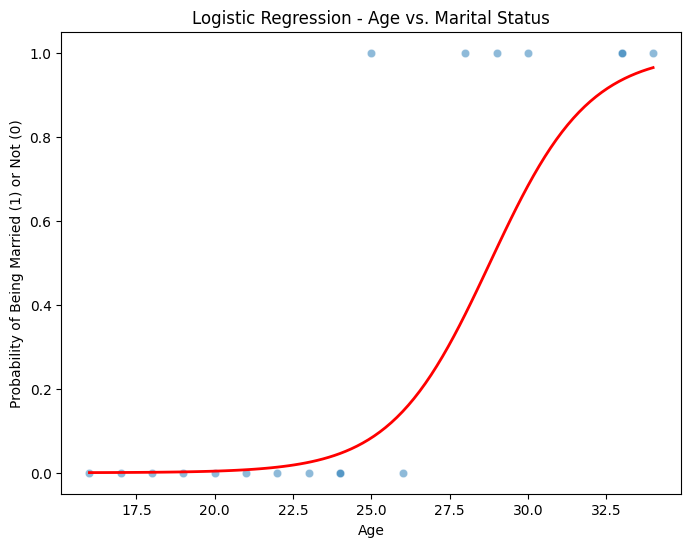

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['status'], alpha=0.5)


age_range = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
predicted_probabilities = model.predict_proba(age_range)[:, 1]

plt.plot(age_range, predicted_probabilities, color='red', linewidth=2)


plt.xlabel("Age")
plt.ylabel("Probability of Being Married (1) or Not (0)")
plt.title("Logistic Regression - Age vs. Marital Status")

plt.show()


In [23]:
age = 30

In [24]:

def predict_status(age):
    age_array = np.array([[age]])
    prediction = model.predict(age_array)[0]
    probability = model.predict_proba(age_array)[0, 1]

    status = "Married" if prediction == 1 else "Not Married"
    print(f"Predicted Marital Status for Age {age}: {status}")
    print(f"Probability of being married: {probability:.2f}")


age_input = int(input("Enter an age: "))
predict_status(age_input)


Enter an age: 30
Predicted Marital Status for Age 30: Married
Probability of being married: 0.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


y_pred = model.predict(xtest)


accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


print("\nClassification Report:")
print(classification_report(ytest, y_pred))


Accuracy: 0.85
Precision: 1.00
Recall: 0.67
F1 Score: 0.80

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88         7
         1.0       1.00      0.67      0.80         6

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



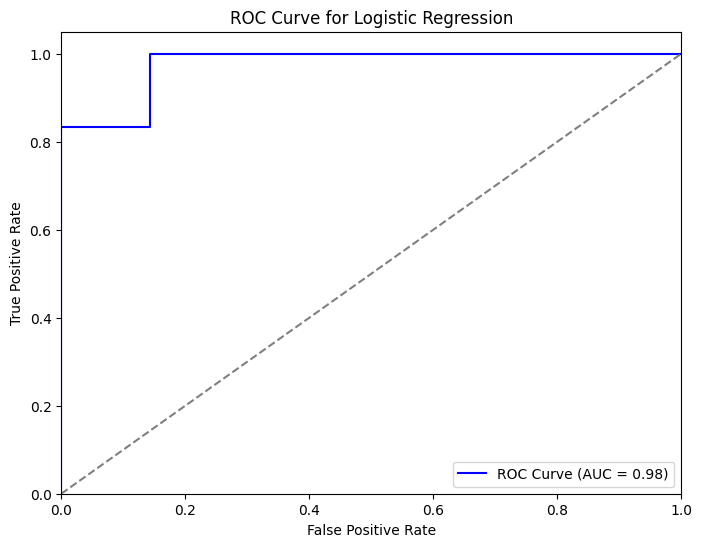

In [26]:
from sklearn.metrics import roc_curve, auc


y_prob = model.predict_proba(xtest)[:, 1]


fpr, tpr, _ = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()
